# Worldwide Bureaucracy Indicators

Let's load some libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure", figsize=(10, 6))

In [2]:
# Let's use a function to display and operate the dataframes

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## Load data

In [3]:
# Let's load the data

df1 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-04-30/wwbi_data.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-04-30/wwbi_series.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-04-30/wwbi_country.csv')

In [4]:
# Let's merge df1 and df2 on 'indicator_code'

df = pd.merge(left=df1, right=df2, how='inner', on='indicator_code')

display('df1', 'df2', 'df')

,country_code,indicator_code,year,value
0,AFG,BI.WAG.PRVS.FM.SM,2007,1.110299
1,AFG,BI.WAG.PRVS.FM.SM,2013,0.649133
2,AFG,BI.WAG.PRVS.FM.MD,2007,0.533333
3,AFG,BI.WAG.PRVS.FM.MD,2013,0.433333
4,AFG,BI.WAG.PUBS.FM.SM,2007,0.858063
...,...,...,...,...
141980,ZWE,BI.WAG.TOTL.PB.ZS,2016,56.617817
141981,ZWE,BI.WAG.TOTL.PB.ZS,2017,48.468880
141982,ZWE,BI.WAG.TOTL.PB.ZS,2018,45.109753
141983,ZWE,BI.WAG.TOTL.PB.ZS,2019,24.029417


In [5]:
# Now let's merge the resulting df with df3

df = pd.merge(left=df3, right=df, how='inner', on='country_code')
df.head()

,country_code,short_name,table_name,long_name,x2_alpha_code,currency_unit,special_notes,region,income_group,wb_2_code,...,vital_registration_complete,latest_agricultural_census,latest_industrial_data,latest_trade_data,latest_population_census_year,latest_population_census_notes,indicator_code,year,value,indicator_name
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,True,NaN,NaN,2018.0,2020.0,(expected),BI.PWK.CMPA.GE.SM,2017,0.998339,Cross-country public sector pay comparison rat...
1,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,True,NaN,NaN,2018.0,2020.0,(expected),BI.PWK.CMPA.GE.MD,2017,1.462588,Cross-country public sector pay comparison rat...
2,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,True,NaN,NaN,2018.0,2020.0,(expected),BI.PWK.CMPA.HD.SM,2017,2.066529,Cross-country public sector pay comparison rat...
3,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,True,NaN,NaN,2018.0,2020.0,(expected),BI.PWK.CMPA.HD.MD,2017,2.795778,Cross-country public sector pay comparison rat...
4,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,NaN,Latin America & Caribbean,High income,AW,...,True,NaN,NaN,2018.0,2020.0,(expected),BI.PWK.CMPA.HN.SM,2017,1.186284,Cross-country public sector pay comparison rat...


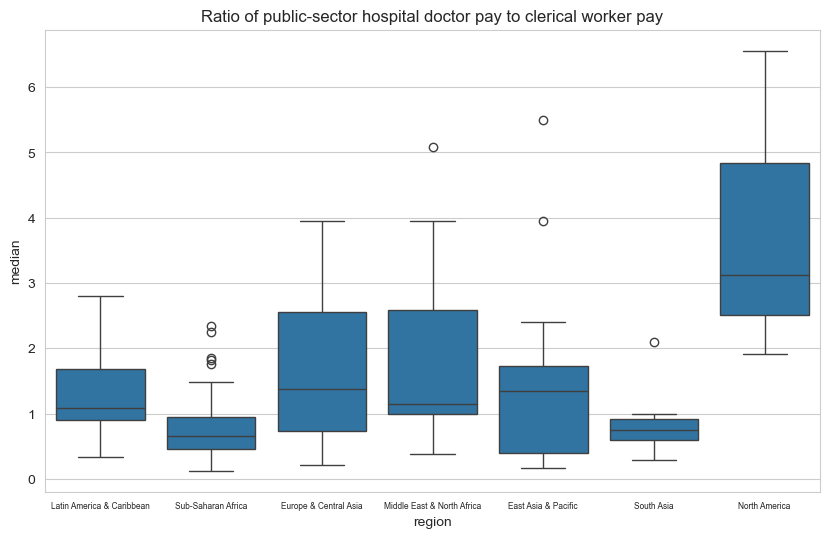

In [6]:
# How well are public sector doctors paid (relative to their colleages)?

sns.set_style('whitegrid')
sns.boxplot(data=(df
    .iloc[:, [1, 7, 31, 32, 30]]
    .query('indicator_name == "Cross-country public sector pay comparison ratio, by occupation: Hospital doctor (using median)"'))
            , x='region', y='value')
plt.xticks(fontsize=6)
plt.ylabel('median')
plt.title('Ratio of public-sector hospital doctor pay to clerical worker pay');

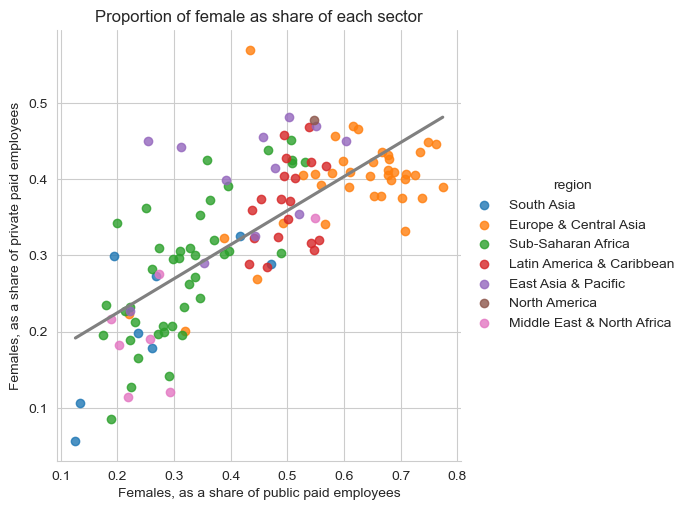

In [7]:
# Proportion of women as a share of public and private sectors?

g = sns.lmplot(data=(df
    .iloc[:, [1, 7, 31, 32]]
    .query('indicator_name == ["Females, as a share of private paid employees", "Females, as a share of public paid employees"]')
    .pivot_table(index=['short_name', 'region'], columns='indicator_name', values='value', aggfunc='mean')
    .reset_index()),
           x='Females, as a share of public paid employees',
           y='Females, as a share of private paid employees',
           hue='region', fit_reg=False);
sns.regplot(data=(df
    .iloc[:, [1, 7, 31, 32]]
    .query('indicator_name == ["Females, as a share of private paid employees", "Females, as a share of public paid employees"]')
    .pivot_table(index=['short_name', 'region'], columns='indicator_name', values='value', aggfunc='mean')
    .reset_index()),
            x='Females, as a share of public paid employees',
            y='Females, as a share of private paid employees',
            scatter=False,
            ax=g.axes.flat[0],
            color='gray',
            label='Overall regression',
            ci=False)

plt.title('Proportion of female as share of each sector');

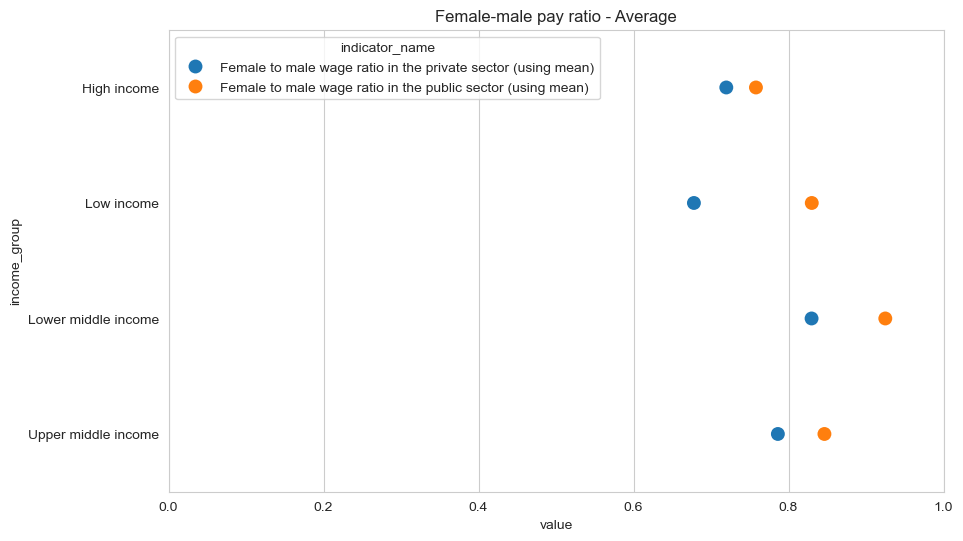

In [8]:
# How is the female-to-male pay ratio in the public and private sectors?

sns.stripplot(data=(df
    .iloc[:, [8, 30, 31, 32]]
    .query('indicator_name == ["Female to male wage ratio in the private sector (using mean)", "Female to male wage ratio in the public sector (using mean)"]')
    .pivot_table(index='income_group', columns='indicator_name', values='value', aggfunc='mean')
    .stack()
    .reset_index(name='value')),
              x='value',
              y='income_group',
              hue='indicator_name',
              jitter=False,
              size=10)

plt.xlim(0, 1)
plt.title('Female-male pay ratio - Average');

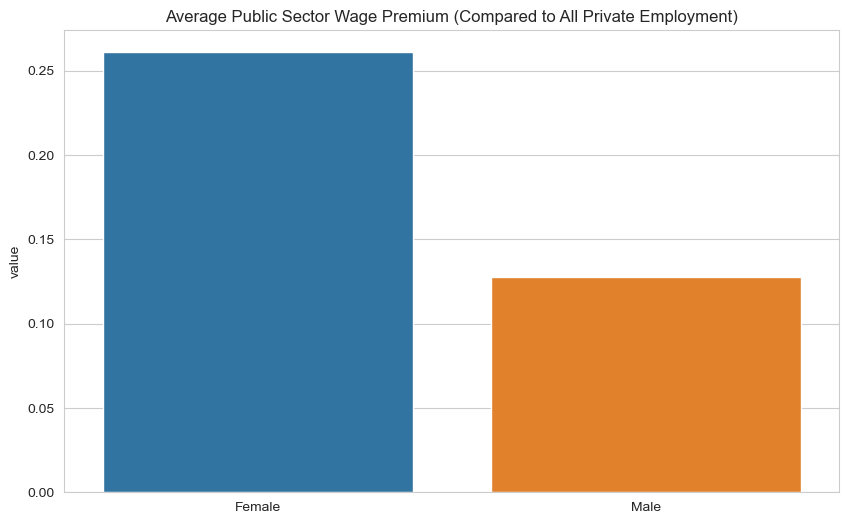

In [9]:
# Public sector premium by gender?

sns.barplot(data=(df
    .iloc[:, [31, 32]]
    .query('indicator_name == ["Public sector wage premium, by gender: Female (compared to all private employees)", "Public sector wage premium, by gender: Male (compared to all private employees)"]')
    .groupby(['indicator_name'])
    .mean()),
            x='indicator_name',
            y='value',
            hue='indicator_name')

plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Average Public Sector Wage Premium (Compared to All Private Employment)')
plt.xlabel(None);

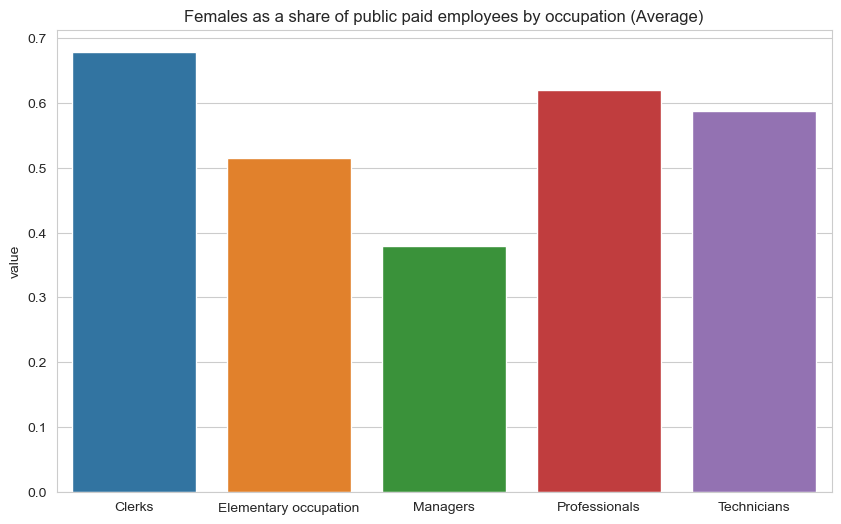

In [10]:
# Women as a share of public employees, by occuption?

sns.barplot(data=(df
    .iloc[:, [31, 32]]
    .query('indicator_name == ["Females, as a share of public paid employees by occupational group: Clerks", "Females, as a share of public paid employees by occupational group: Elementary occupation", "Females, as a share of public paid employees by occupational group: Managers", "Females, as a share of public paid employees by occupational group: Professionals", "Females, as a share of public paid employees by occupational group: Technicians"]')
    .groupby(['indicator_name'])
    .mean()),
            x='indicator_name',
            y='value',
            hue='indicator_name')

plt.xticks([0, 1, 2, 3, 4], ['Clerks', 'Elementary occupation', 'Managers', 'Professionals', 'Technicians'])
plt.xlabel(None)
plt.title('Females as a share of public paid employees by occupation (Average)');

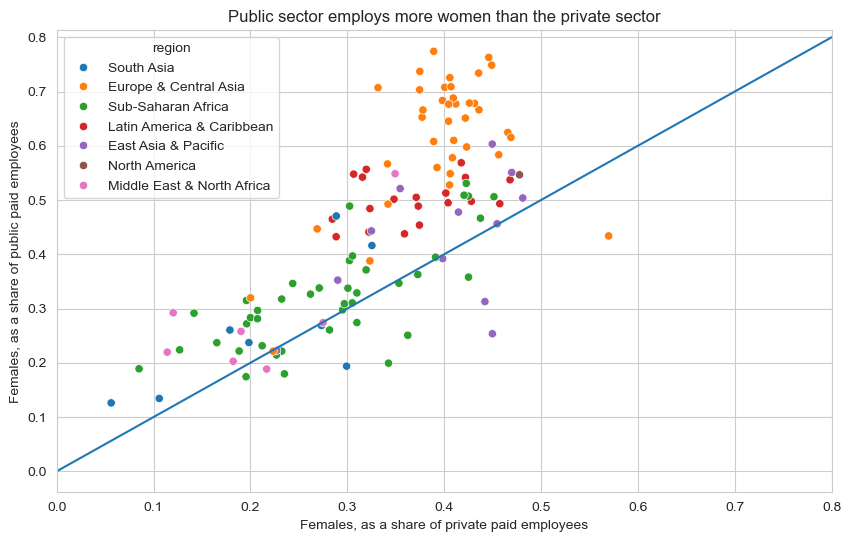

In [11]:
# Public sector vs private sector women employing

sns.scatterplot(data=(df
    .iloc[:, [1, 7, 31, 32]]
    .query('indicator_name == ["Females, as a share of private paid employees", "Females, as a share of public paid employees"]')
    .pivot_table(index=['short_name', 'region'], columns='indicator_name', values='value', aggfunc='mean')
    .reset_index()),
                x='Females, as a share of private paid employees',
                y='Females, as a share of public paid employees',
                hue='region')

plt.xlim(0.0, 0.8)
plt.title('Public sector employs more women than the private sector')
plt.axline((0, 0), slope=1);